Step 1: Import Libraries

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Step 2: Load Dataset

In [3]:
df=pd.read_csv('Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


Step 3: Preprocessing

In [13]:
# Check categorical columns
print("\nCategorical columns:")
print(df.select_dtypes(include=['object']).columns)

# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df, drop_first=True)

print("\nShape before encoding:", df.shape)
print("Shape after encoding :", df_encoded.shape)


Categorical columns:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

Shape before encoding: (545, 13)
Shape after encoding : (545, 14)


Step 4: Define Features & Target

In [14]:
# Target column = 'price'
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

print("Features shape:", X.shape)
print("Target shape  :", y.shape)

Features shape: (545, 13)
Target shape  : (545,)


Step 5: Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Step 6: Train Linear Regression Model

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Step 7: Predictions & Evaluation

In [17]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")


📊 Model Performance:
MAE  : 970043.40
MSE  : 1754318687330.66
RMSE : 1324506.96
R²   : 0.65


Step 8: Visualization

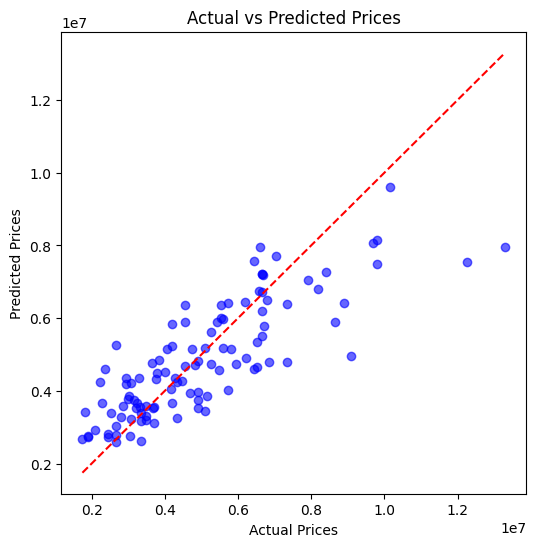

In [18]:
# Actual vs Predicted plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


Step 9: Coefficients (Feature Importance)

In [19]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nFeature Coefficients:")
print(coeff_df.sort_values(by="Coefficient", ascending=False))


Feature Coefficients:
                                  Coefficient
bathrooms                        1.094445e+06
airconditioning_yes              7.914267e+05
hotwaterheating_yes              6.846499e+05
prefarea_yes                     6.298906e+05
stories                          4.074766e+05
basement_yes                     3.902512e+05
mainroad_yes                     3.679199e+05
guestroom_yes                    2.316100e+05
parking                          2.248419e+05
bedrooms                         7.677870e+04
area                             2.359688e+02
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
